In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("2017_jun_final.csv")

In [3]:
df.head()

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,...,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


In [4]:
df.shape

(8704, 25)

In [8]:
df.dtypes

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [108]:
df.isnull().sum()

N                                      0
Должность                              0
Язык.программирования               3850
Специализация                       7219
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Университет                          358
Еще.студент                            0
Уровень.английского                    0
Предметная.область                   223
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
Валюта                              8694
cls             

In [4]:
tmp = df[df.columns.difference(['Язык.программирования'])].isna().any()
clear_df = df.drop(tmp.index[tmp], axis=1)

In [109]:
clear_df.isnull().sum()

N                                      0
Должность                              0
Язык.программирования               3850
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Еще.студент                            0
Уровень.английского                    0
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
dtype: int64

In [110]:
clear_df.dropna().isnull().sum()

N                                   0
Должность                           0
Язык.программирования               0
Общий.опыт.работы                   0
Опыт.работы.на.текущем.месте        0
Зарплата.в.месяц                    0
Изменение.зарплаты.за.12.месяцев    0
Город                               0
Размер.компании                     0
Тип.компании                        0
Пол                                 0
Возраст                             0
Образование                         0
Еще.студент                         0
Уровень.английского                 0
Дата.заполнения                     0
User.Agent                          0
exp                                 0
current_job_exp                     0
salary                              0
dtype: int64

In [5]:
python_data = clear_df[clear_df["Язык.программирования"]=="Python"]
python_data

,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
12,13,Software Engineer,Python,1,меньше 3 месяцев,800,200,Киев,до 50 человек,Аутсорсинговая,мужской,26,Высшее,False,ниже среднего,12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800
68,69,Software Engineer,Python,1.5,0.5,900,900,Киев,до 10 человек,Стартап,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900
87,88,Junior Software Engineer,Python,0.5,0.5,600,0,Киев,до 10 человек,Аутсорсинговая,мужской,19,Незаконченное высшее,True,выше среднего,12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600
114,115,Junior Software Engineer,Python,1.5,0.5,685,250,Киев,до 1000 человек,Аутсорсинговая,мужской,21,Незаконченное высшее,False,средний,12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.5,685
143,144,Junior Software Engineer,Python,1,1,750,250,Киев,до 10 человек,Аутсорсинговая,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,1.0,750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8546,8547,Software Engineer,Python,5,1,2000,800,Запорожье,до 50 человек,Аутсорсинговая,мужской,22,Незаконченное высшее,False,средний,10/07/2017 14:11:26,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5...,5.0,1.0,2000
8625,8626,Software Engineer,Python,4,1,1750,0,Киев,свыше 1000 человек,Аутсорсинговая,мужской,28,Среднее,False,средний,11/07/2017 16:15:40,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,4.0,1.0,1750
8635,8636,Senior Software Engineer,Python,10 и более лет,меньше 3 месяцев,4000,1300,Удаленно,до 10 человек,Стартап,мужской,33,Высшее,False,выше среднего,11/07/2017 17:51:36,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,10.0,0.0,4000
8673,8674,Junior Software Engineer,Python,0.5,0.5,350,50,Киев,до 50 человек,Аутсорсинговая,мужской,22,Высшее,False,средний,12/07/2017 09:37:16,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,0.5,0.5,350


In [14]:
python_data.shape

(207, 20)

In [15]:
group_position = python_data.groupby("Должность")

In [112]:
group_val = python_data["Должность"].value_counts()
group_val

Должность
Software Engineer           100
Junior Software Engineer     63
Senior Software Engineer     31
Technical Lead               11
System Architect              2
Name: count, dtype: int64

In [16]:
position_python = group_position.agg({"Зарплата.в.месяц" : ["max", "min"]})
position_python

Зарплата.в.месяц      
                                      max   min
Должность                                      
Junior Software Engineer             1250   100
Senior Software Engineer             9200  1300
Software Engineer                    5400   500
System Architect                     5000  3000
Technical Lead                       6200  1425

In [113]:
def fill_avg_salary(salary):
    return salary.mean()
position_python["avg"] = position_python.apply(fill_avg_salary, axis=1)
position_python

Зарплата.в.месяц           avg
                                      max   min        
Должность                                              
Junior Software Engineer             1250   100   675.0
Software Engineer                    5400   500  2950.0
Technical Lead                       6200  1425  3812.5
System Architect                     5000  3000  4000.0
Senior Software Engineer             9200  1300  5250.0

In [114]:
position_python['avg'].describe()

count       5.000000
mean     3337.500000
std      1700.091909
min       675.000000
25%      2950.000000
50%      3812.500000
75%      4000.000000
max      5250.000000
Name: avg, dtype: float64

In [72]:
position_python.to_csv("result.csv", index=False)

In [115]:
position_python = position_python.sort_values("avg", ascending=True)

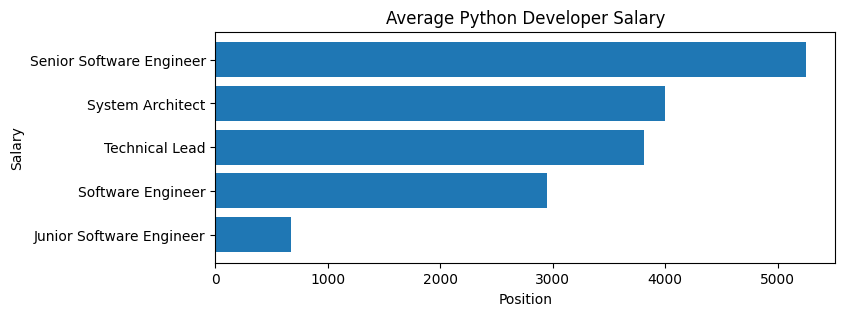

In [116]:
plt.figure(figsize=(8, 3))
plt.barh(position_python.index, position_python["avg"])
plt.xlabel("Position")
plt.ylabel("Salary")
plt.title("Average Python Developer Salary")
plt.show()

<BarContainer object of 22 artists>

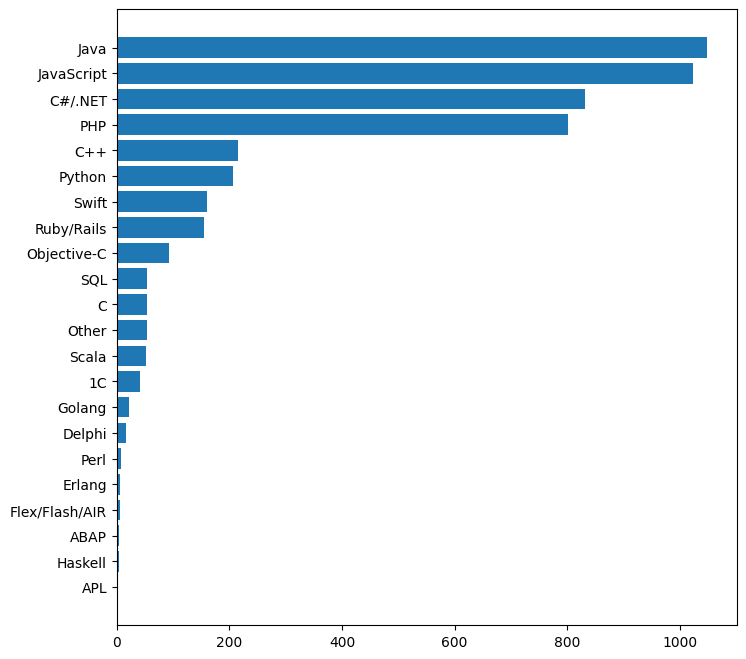

In [121]:
plt.figure(figsize=(8, 8))
tmp = clear_df.dropna().groupby("Язык.программирования").agg("count")["N"].sort_values(ascending=True)
plt.barh(tmp.index, tmp)

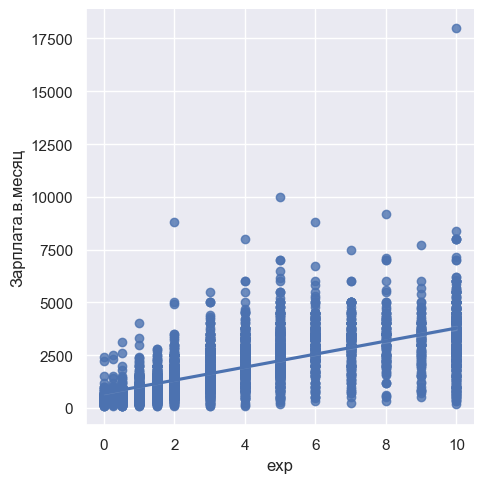

In [42]:
tmp2 = clear_df.dropna()[["Зарплата.в.месяц", "Язык.программирования", "exp"]]
sns.lmplot(y="Зарплата.в.месяц", x="exp", data=tmp2)